<a href="https://colab.research.google.com/github/SaiMithunPunna/AIDS/blob/main/TNSE_Fashion_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [27]:
df_train=pd.read_csv('/content/fashion-mnist_train.csv')
df_test=pd.read_csv('/content/fashion-mnist_test.csv')

In [28]:
df_train.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:

# x = df_train.drop('label',axis=1)
# y_train = df_train['label']
#  = df_test.drop('label',axis=1)
# y_test = df_test['label']



x = df_train.drop('label',axis=1)
y= df_train['label']

In [31]:
feature_names=x.columns.tolist()
target_names=y.unique().tolist()

In [32]:
df=pd.DataFrame(x , columns=feature_names)
df['Target']=y
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,0,0,0,0,0,0,0,5,0,0,...,0,0,30,43,0,0,0,0,0,6
3,0,0,0,1,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [33]:
#standardize the features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

In [34]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(X_scaled)
x_pca[:5]

array([[ 10.66497292,  14.99336346],
       [-11.98974762,  11.81277013],
       [ 20.51767123,   1.57978434],
       [  9.63453514,  -6.79091712],
       [ 11.49344189, -11.65548804]])

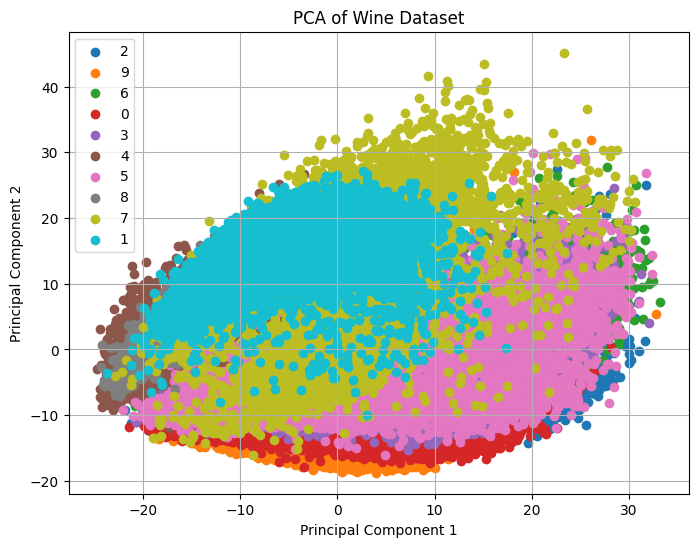

In [35]:
plt.figure(figsize=(8,6))
for i , target_name in enumerate (target_names):
  plt.scatter(x_pca[y==i , 0] , x_pca[y==i , 1] , label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.legend()
plt.grid(True)
plt.show()

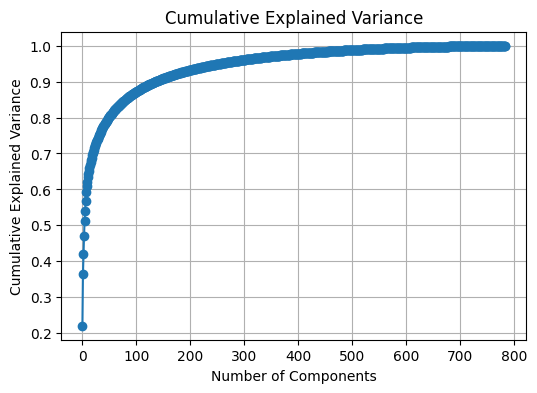

In [36]:
pca_full=PCA().fit(X_scaled)
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_),marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [38]:
x_scaled=scaler.fit_transform(x)

In [40]:
tsne=TSNE(n_components=2 , perplexity=30 , learning_rate=200 , n_iter=1000 , random_state=42)
x_tsne=tsne.fit_transform(x_pca)

#create a dataframe for visualization
df_tsne = pd.DataFrame(x_tsne, columns=['Dim1', 'Dim2'])
df_tsne['Target'] = y
df_tsne

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


,Dim1,Dim2,Target
0,25.685289,35.743729,2
1,-26.231205,44.263229,9
2,53.179649,6.581449,6
3,24.213730,-17.978346,0
4,37.704651,-35.162106,3
...,...,...,...
59995,8.234659,38.020802,9
59996,-41.186535,-43.712555,1
59997,14.178231,-2.371816,8
59998,19.899597,49.567032,8


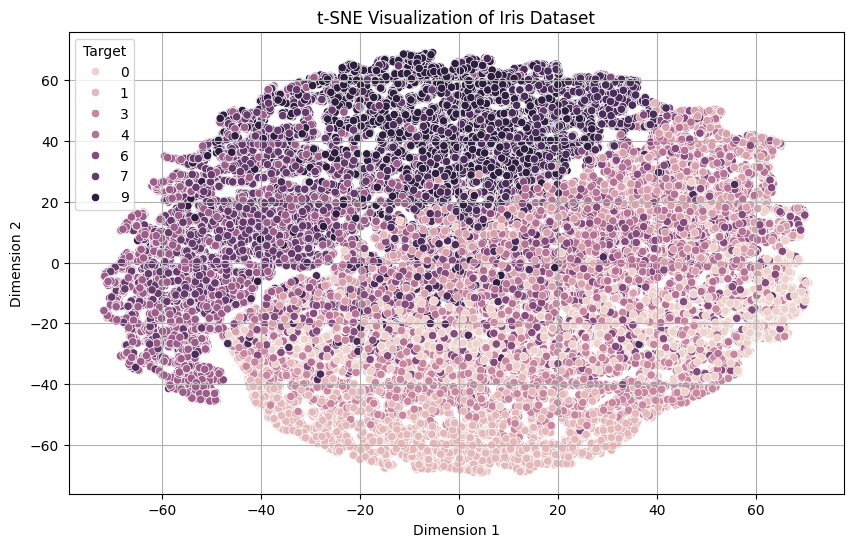

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dim1', y='Dim2', hue='Target', data=df_tsne)
plt.title('t-SNE Visualization of Iris Dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()